# Task 1 — Three Coding Challenges
**Machine Learning**

solved **all three** challenges:
1) Linear Regression on a housing dataset
2) Data cleaning & EDA on Titanic dataset
3) Decision Tree classifier on Drug dataset


In [1]:
# ---- Utility: SAFE_READ_CSV (no google.colab required) ----
import os, pandas as pd

def SAFE_READ_CSV(preferred_paths, fallback_msg):
    # Try a list of paths. If not found, ask for a manual path via input().
    for p in preferred_paths:
        if os.path.exists(p):
            try:
                df = pd.read_csv(p)
                print(f"Loaded dataset from: {p}")
                return df
            except Exception as e:
                print(f"Found {p} but couldn't read it as CSV: {e}")
    print(fallback_msg)
    manual = input("➡ Enter full path to your CSV (or press Enter to cancel): ").strip()
    if manual:
        if not os.path.exists(manual):
            raise FileNotFoundError(f"Path does not exist: {manual}")
        return pd.read_csv(manual)
    raise FileNotFoundError("CSV not found. Please place the file next to this notebook or give a valid path.")


## Challenge 1 — Linear Regression (House Prices)
**Goal:** Train a basic linear regression model to predict house prices.

**Dataset:** `Housing.csv`.

**Steps:**
- Load data
- Pick numeric features & a target
- Train/test split
- Fit `LinearRegression`
- Evaluate: R² and MAE
- Plot predictions vs actuals


Loaded dataset from: data/Housing.csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Target column: price
R^2: 0.5464062355495873
MAE: 1127483.3523235186
Coefficients (feature -> weight):
 - area: 308.8670
 - bedrooms: 151246.7506
 - bathrooms: 1185731.7137
 - stories: 495100.7627
 - parking: 337660.8303
Intercept: 51999.67680883687


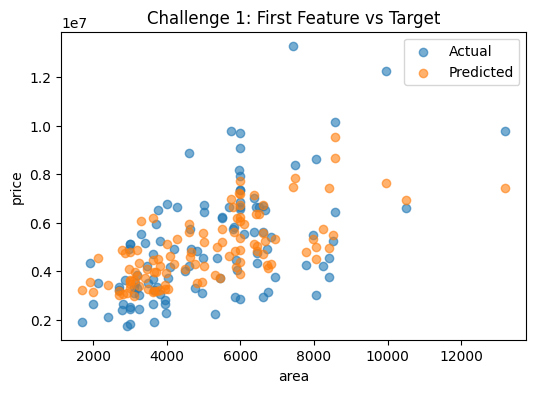

In [4]:
# --- Challenge 1: Linear Regression (Housing) ---
import os, pandas as pd, numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Try local path first
possible_paths = [
    "/mnt/mnt/data/Housing.csv",
    "Housing.csv",
    "data/Housing.csv"
]

df_housing = SAFE_READ_CSV(
    preferred_paths=[
        "/mnt/mnt/data/Housing.csv",
        "Housing.csv",
        "data/Housing.csv"
    ],
    fallback_msg=("No housing dataset found at default locations. "
                "Place 'Housing.csv' in the same folder as this notebook or enter a full path when prompted.")
)

display(df_housing.head())

# Heuristic: choose a target column commonly used for housing
candidate_targets = [c for c in df_housing.columns if c.lower() in ["price", "medv"]]
if candidate_targets:
    target = candidate_targets[0]
else:
    # if not obvious, take the last numeric column as target
    num_cols = df_housing.select_dtypes(include=[np.number]).columns.tolist()
    if not num_cols:
        raise ValueError("No numeric columns detected to use as target.")
    target = num_cols[-1]

# Features = all other numeric columns
num_cols = df_housing.select_dtypes(include=[np.number]).columns.tolist()
X_cols = [c for c in num_cols if c != target]
if not X_cols:
    raise ValueError("No numeric feature columns found apart from target.")

X = df_housing[X_cols].copy()
y = df_housing[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("Target column:", target)
print("R^2:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("Coefficients (feature -> weight):")
for feat, w in zip(X_cols, model.coef_):
    print(f" - {feat}: {w:.4f}")
print("Intercept:", model.intercept_)

# Simple scatter for first feature vs y (if feasible)
plt.figure(figsize=(6,4))
plt.scatter(X_test.iloc[:,0], y_test, alpha=0.6, label="Actual")
plt.scatter(X_test.iloc[:,0], pred, alpha=0.6, label="Predicted")
plt.xlabel(X_cols[0]); plt.ylabel(target); plt.title("Challenge 1: First Feature vs Target")
plt.legend(); plt.show()

## Challenge 2 — Data Cleaning & EDA (Titanic)
**Goal:** Use Pandas to explore and clean Titanic data.

**Dataset:** `Titanic-Dataset.csv`.

**Steps:**
- Inspect info & head
- Find missing values & duplicates
- Clean: impute `Age`, `Embarked`, drop `Cabin`, remove duplicates
- Verify cleanliness


In [5]:
# --- Challenge 2: Titanic Cleaning ---
import os, pandas as pd

titanic_paths = [
    "/mnt/data/Titanic-Dataset.csv",
    "Titanic-Dataset.csv",
    "data/Titanic-Dataset.csv"
]

df_titanic = SAFE_READ_CSV(
    preferred_paths=[
        "/mnt/data/Titanic-Dataset.csv",
        "Titanic-Dataset.csv",
        
    "data/Titanic-Dataset.csv"
    ],
    fallback_msg=("No Titanic dataset found at default locations. "
                  "Place 'Titanic-Dataset.csv' with this notebook or enter a full path when prompted.")
)

print("\nDataset Info:\n")
print(df_titanic.info())

print("\nFirst 5 Rows:\n")
display(df_titanic.head())

print("\nMissing Values (before):\n")
print(df_titanic.isnull().sum())

duplicates = df_titanic.duplicated().sum()
print(f"\nNumber of duplicates (before): {duplicates}")

# Cleaning
if 'Age' in df_titanic.columns:
    df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].median())
if 'Embarked' in df_titanic.columns:
    df_titanic['Embarked'] = df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0])
if 'Cabin' in df_titanic.columns:
    df_titanic = df_titanic.drop(columns=['Cabin'])
df_titanic = df_titanic.drop_duplicates()

print("\nMissing Values (after):\n")
print(df_titanic.isnull().sum())

print("\nPreview after cleaning:\n")
display(df_titanic.head())

Loaded dataset from: data/Titanic-Dataset.csv

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

First 5 Rows:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Missing Values (before):

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Number of duplicates (before): 0

Missing Values (after):

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Preview after cleaning:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Challenge 3 — Decision Tree (Drug Classification)
**Goal:** Train a decision tree classifier on `drug200.csv` to predict `Drug`.

**Steps:**
- Label encode categorical features
- Train/test split
- Fit `DecisionTreeClassifier`
- Evaluate accuracy
- Visualize the tree


Loaded dataset from: data/drug200.csv


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Accuracy: 1.0000


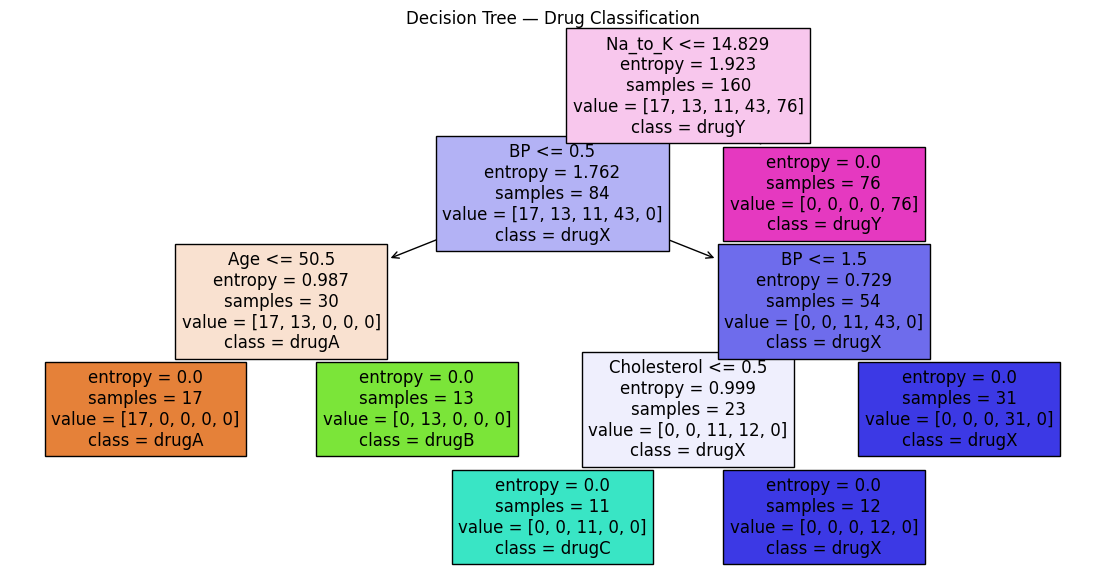

In [6]:
# --- Challenge 3: Decision Tree on drug200 ---
import os, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

drug_paths = [
    "/mnt/data/drug200.csv",
    "drug200.csv",
    "data/drug200.csv"
]

df_drug = SAFE_READ_CSV(
    preferred_paths=[
        "/mnt/data/drug200.csv",
        "drug200.csv",
        
    "data/drug200.csv"
    ],
    fallback_msg=("No drug dataset found at default locations. "
                  "Place 'drug200.csv' beside this notebook or enter a full path when prompted.")
)

display(df_drug.head())

# Encode categoricals commonly present
categorical_cols = [c for c in df_drug.columns if df_drug[c].dtype == 'object' and c != 'Drug']
encoders = {}
for c in categorical_cols:
    le = LabelEncoder()
    df_drug[c] = le.fit_transform(df_drug[c])
    encoders[c] = le

X = df_drug.drop(columns=['Drug'])
y = df_drug['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)
print(f"Accuracy: {acc:.4f}")

plt.figure(figsize=(14,7))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.title("Decision Tree — Drug Classification")
plt.show()